In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import pandas as pd 

G = nx.Graph()


In [2]:
routes = pd.read_csv('routes.txt', sep=",", header=None)
airports = pd.read_csv('airportsInfo.txt', sep=",", header=None)

routes.columns = ["Airline", "Airline_ID", "Source_Airport", "Source_Airport_ID", "Dest_Airport", "Dest_Airport_ID", "Codeshare", "Stops", "Equipment"]
routes = routes.drop(["Airline", "Airline_ID", "Source_Airport_ID", "Dest_Airport_ID", "Codeshare", "Stops", "Equipment"], axis=1)

airports.columns = ["Airport_ID", "Name", "City", "Country", "IATA", "ICAO", "Lat", "Long", "Alt", "Timezone", "DST", "Tz", "Type", "Source"]
airports = airports.drop(["Airport_ID", "Name", "City", "ICAO", "Lat", "Long", "Alt", "Timezone", "DST", "Tz", "Type", "Source"], axis=1)

airports.head()
#routes.head()

merge1 = pd.merge(routes, airports, how='inner', on=None, left_on='Source_Airport', right_on='IATA',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merge1.columns = ["Source_Airport", "Dest_Airport", "Source_Country", "Source_IATA"]

merge2 = pd.merge(merge1, airports, how='inner', on=None, left_on='Dest_Airport', right_on='IATA',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merge2.columns = ["Source_Airport", "Dest_Airport", "Source_Country", "Source_IATA", "Dest_Country", "Dest_IATA"]

flights = merge2.drop(["Source_Airport", "Dest_Airport", "Source_IATA", "Dest_IATA"], axis=1)

flights.head()

,Source_Country,Dest_Country
0,Algeria,Algeria
1,France,Algeria
2,Turkey,Algeria
3,France,Algeria
4,France,Algeria


In [4]:
countries = ["Australia", "Brazil", "Canada", "Colombia", "Costa Rica", "France", "Germany", "Guatemala", "Hong Kong",
            "India", "Japan", "Mexico", "Netherlands", "New Zealand", "Philippines", "Singapore", "Sweden", "Turkey", "United Kingdom", "United States"];

#for idx, row in flights.iterrows():
#    print (row[0])
#    print (row[1])


In [5]:


#nodearr = pd.unique(trade[['Country 1', 'Country 2']].values.ravel('K'))
for n in countries:
    G.add_node(n)

for idx, row in flights.iterrows():
    if (row[0] in countries and row[1] in countries):
        G.add_edge(row[0], row[1])

    

In [40]:
print(list(G.nodes))
print(list(G.edges))
print(len(G.edges))

['Australia', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'France', 'Germany', 'Guatemala', 'Hong Kong', 'India', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Philippines', 'Singapore', 'Sweden', 'Turkey', 'United Kingdom', 'United States']
[('Australia', 'Australia'), ('Australia', 'New Zealand'), ('Australia', 'Hong Kong'), ('Australia', 'Singapore'), ('Australia', 'United States'), ('Australia', 'Japan'), ('Australia', 'India'), ('Australia', 'Philippines'), ('Australia', 'Canada'), ('Brazil', 'Brazil'), ('Brazil', 'Netherlands'), ('Brazil', 'United States'), ('Brazil', 'Colombia'), ('Brazil', 'France'), ('Brazil', 'Germany'), ('Brazil', 'United Kingdom'), ('Brazil', 'Turkey'), ('Brazil', 'Mexico'), ('Brazil', 'Canada'), ('Canada', 'New Zealand'), ('Canada', 'Canada'), ('Canada', 'Netherlands'), ('Canada', 'United States'), ('Canada', 'France'), ('Canada', 'Colombia'), ('Canada', 'Mexico'), ('Canada', 'Germany'), ('Canada', 'United Kingdom'), ('Canada', 'Hong Kong'), ('Canada

In [39]:
allshortestpaths = nx.shortest_path(G)

allshortestpathsdict = {}

for x in countries:
    countryshortestpathsdict = {}
    for y in countries:
        if x != y and y in allshortestpaths[x].keys():
            #print(x)
            #print(y)
            #print(allshortestpaths[x][y])
            countryshortestpathsdict[y] = allshortestpaths[x][y]
    allshortestpathsdict[x] = countryshortestpathsdict

allshortestpathsdict



{'Australia': {'Brazil': ['Australia', 'United States', 'Brazil'],
  'Canada': ['Australia', 'Canada'],
  'Colombia': ['Australia', 'United States', 'Colombia'],
  'Costa Rica': ['Australia', 'United States', 'Costa Rica'],
  'France': ['Australia', 'Hong Kong', 'France'],
  'Germany': ['Australia', 'Hong Kong', 'Germany'],
  'Guatemala': ['Australia', 'United States', 'Guatemala'],
  'Hong Kong': ['Australia', 'Hong Kong'],
  'India': ['Australia', 'India'],
  'Japan': ['Australia', 'Japan'],
  'Mexico': ['Australia', 'United States', 'Mexico'],
  'Netherlands': ['Australia', 'Hong Kong', 'Netherlands'],
  'New Zealand': ['Australia', 'New Zealand'],
  'Philippines': ['Australia', 'Philippines'],
  'Singapore': ['Australia', 'Singapore'],
  'Sweden': ['Australia', 'United States', 'Sweden'],
  'Turkey': ['Australia', 'Hong Kong', 'Turkey'],
  'United Kingdom': ['Australia', 'Hong Kong', 'United Kingdom'],
  'United States': ['Australia', 'United States']},
 'Brazil': {'Australia': ['B

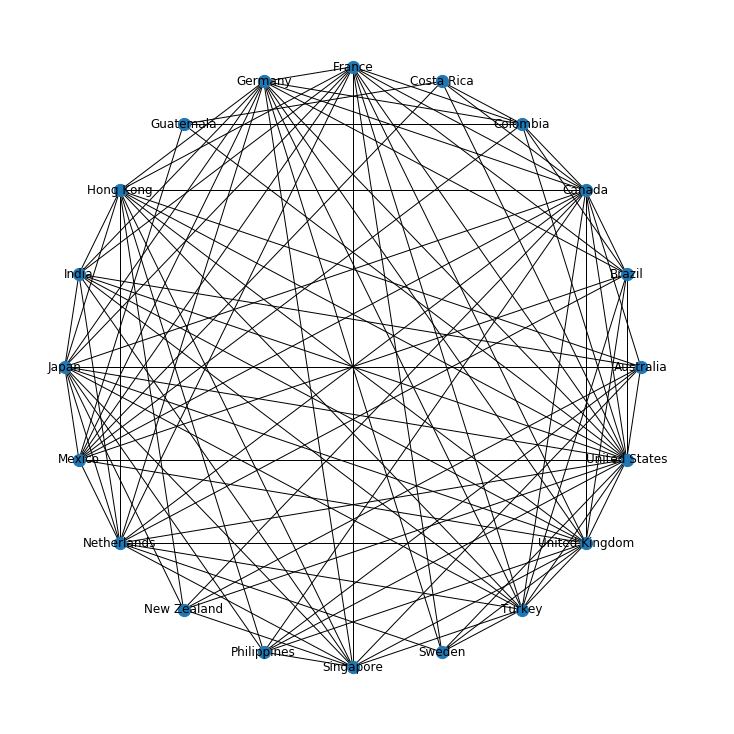

In [22]:
import matplotlib.pyplot as plt
#!pip install scipy
from scipy.optimize import minimize

nx.draw_circular(G, with_labels=True, font_size=12, node_size=150)

axes = plt.gca()
axes.set_xlim([-1.2, 1.3])
axes.set_ylim([-1.2, 1.2])
plt.axis('off')
plt.rcParams['figure.figsize'] = [10, 10]

#edge_labels = nx.draw_networkx_edge_labels(Gsmall, pos=nx.shell_layout(Gsmall, nlist=[['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States'], ['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey'], ["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"]]))

#nx.draw_networkx_edge_labels(Gsmall, edge_labels)
#plt.savefig("test.png") # save as png
plt.show()